In [20]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import re

In [4]:
df = pd.read_csv('gtb.csv', encoding='ISO-8859-1')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', df.shape[1]):
    print(df.head(5))

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Sa

In [6]:
df.drop(columns=['eventid','iday','imonth', 'approxdate', 'extended', 'resolution', 'provstate', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'natlty2', 'natlty2_txt', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperpcap', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim'], inplace=True)

In [7]:
# 'weaptype2_txt', 'weaptype2', 'weapsubtype2', 'weapsubtype2_txt'  #si je veux enlever les secondes armes
df.drop(columns=['weaptype3_txt', 'weaptype3', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4_txt', 'weaptype4', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail', 'nkillus', 'nwoundus', 'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'], inplace=True)

In [8]:
df.drop(columns=['ransompaid', 'ransomamtus'], inplace=True)
df.drop(columns=['nwoundte', 'nperps', 'claimed'], inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', df.shape[1]):
    print(df.head(10))

   iyear  country         country_txt  region                   region_txt  \
0   1970       58  Dominican Republic       2  Central America & Caribbean   
1   1970      130              Mexico       1                North America   
2   1970      160         Philippines       5               Southeast Asia   
3   1970       78              Greece       8               Western Europe   
4   1970      101               Japan       4                    East Asia   
5   1970      217       United States       1                North America   
6   1970      218             Uruguay       3                South America   
7   1970      217       United States       1                North America   
8   1970      217       United States       1                North America   
9   1970      217       United States       1                North America   

            city  success  suicide  attacktype1  \
0  Santo Domingo        1        0            1   
1    Mexico city        1        0     

In [9]:
print('Nombre de lignes : ' + str(df.shape[0]) + '\nPourcentage de vide : \n' + str((df.isna().sum()*100)/df.shape[0]))

Nombre de lignes : 181691
Pourcentage de vide : 
iyear                0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
city                 0.238867
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
attacktype2         96.524869
attacktype2_txt     96.524869
attacktype3         99.764435
attacktype3_txt     99.764435
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
targtype2           93.866510
targtype2_txt       93.866510
targsubtype2        94.119136
targsubtype2_txt    94.119136
corp2               94.431755
target2             93.934757
targtype3           99.352747
targtype3_txt       99.352747
targsubtype3        99.396228
targsubtype3_txt    9

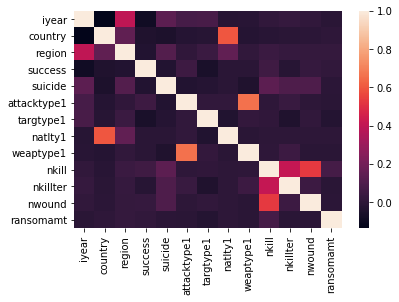

In [10]:
df_forcorr = df.filter(items=['iyear', 'country', 'region', 'success', 'suicide', 'attacktype1', 'targtype1', 'natlty1', 'weaptype1', 'nkill', 'nkillter', 'nwound','ransomamt'])
sns.heatmap(df_forcorr.corr(), annot=False)

[Text(0,0,'Assassination'),
 Text(0,0,'Hostage Taking (Kidnapping)'),
 Text(0,0,'Bombing/Explosion'),
 Text(0,0,'Facility/Infrastructure Attack'),
 Text(0,0,'Armed Assault'),
 Text(0,0,'Hijacking'),
 Text(0,0,'Unknown'),
 Text(0,0,'Unarmed Assault'),
 Text(0,0,'Hostage Taking (Barricade Incident)')]

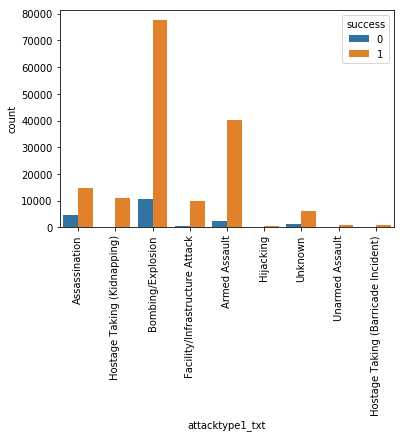

In [13]:
plot = sns.countplot(df['attacktype1_txt'], hue=df['success'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

[Text(0,0,'Armed Assault'),
 Text(0,0,'Assassination'),
 Text(0,0,'Bombing/Explosion'),
 Text(0,0,'Facility/Infrastructure Attack'),
 Text(0,0,'Hijacking'),
 Text(0,0,'Hostage Taking (Barricade Incident)'),
 Text(0,0,'Hostage Taking (Kidnapping)'),
 Text(0,0,'Unarmed Assault'),
 Text(0,0,'Unknown')]

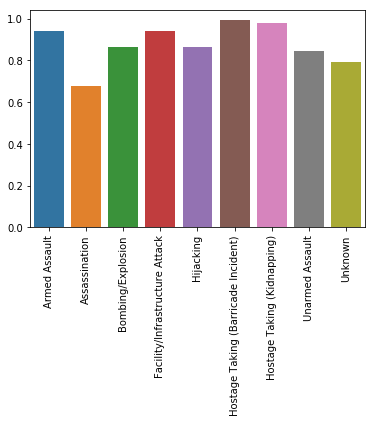

In [14]:
freq_success = 1-((df['attacktype1_txt'][df['success'] == 0].value_counts())/(df['attacktype1_txt'][df['success'] == 1].value_counts()))
plot = sns.barplot(x=freq_success.index, y=freq_success.values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

[Text(0,0,'Pakistan'),
 Text(0,0,'Afghanistan'),
 Text(0,0,'India'),
 Text(0,0,'Colombia'),
 Text(0,0,'Philippines'),
 Text(0,0,'Peru'),
 Text(0,0,'El Salvador'),
 Text(0,0,'United Kingdom'),
 Text(0,0,'Turkey'),
 Text(0,0,'Somalia'),
 Text(0,0,'Nigeria'),
 Text(0,0,'Thailand'),
 Text(0,0,'Yemen'),
 Text(0,0,'Spain'),
 Text(0,0,'Sri Lanka'),
 Text(0,0,'United States'),
 Text(0,0,'Algeria'),
 Text(0,0,'France'),
 Text(0,0,'Egypt')]

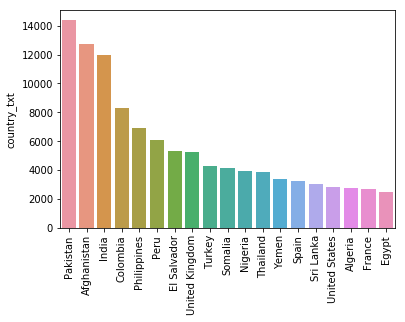

In [15]:
plot = sns.barplot(x=df['country_txt'].value_counts()[1:20,].index, y=df['country_txt'].value_counts()[1:20,]) #sélection des 20 premiers pays à être touchés
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

ValueError: array length 47 does not match index length 181691

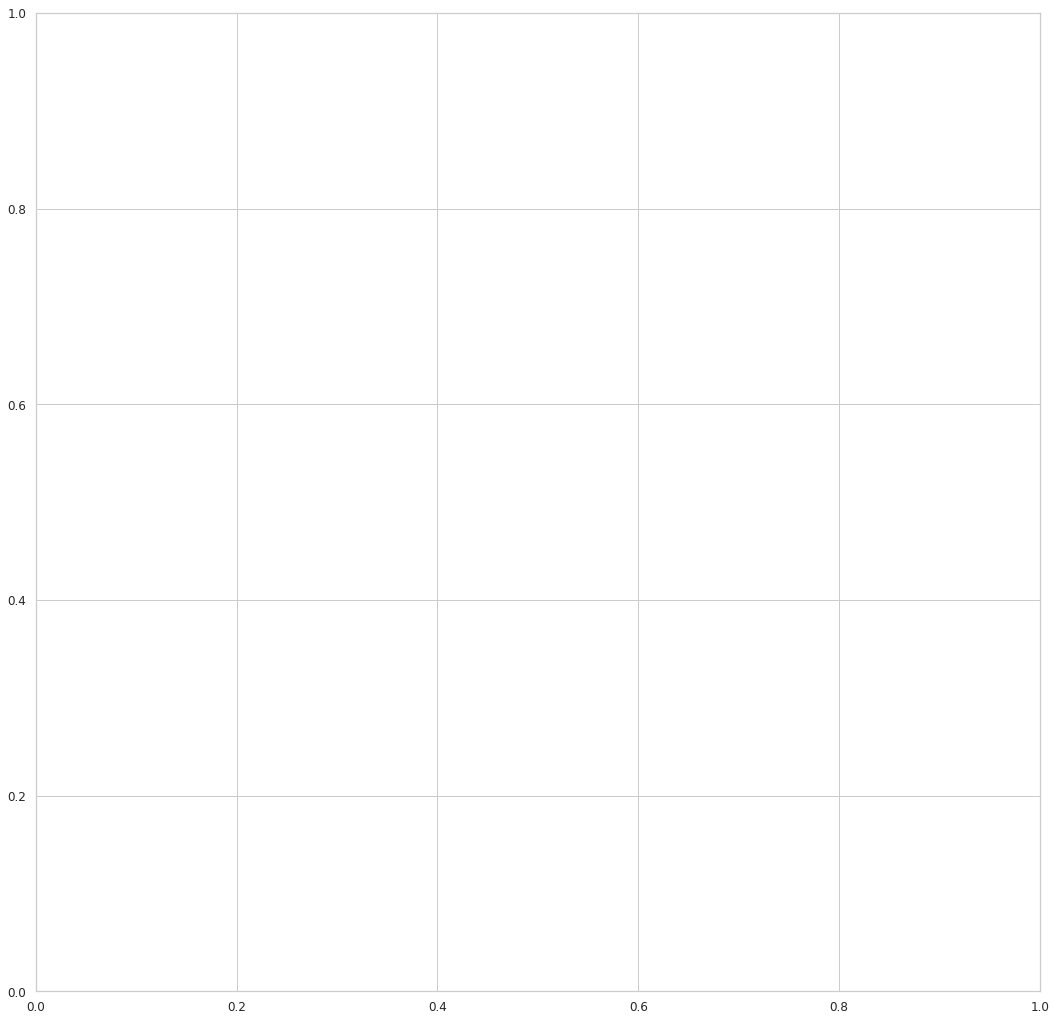

In [125]:
figsize=(18, 18)
params = get_params()

plt.rcParams.update(params)
plt.tick_params(labelsize=12)
sns.lineplot(x=df['iyear'].unique(), y=df['iyear'])
plt.title('Distribution des attentats par année')
plt.xticks(rotation=90)
# plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

In [117]:
grouped_year = df.groupby('iyear')
def get_params():
    params = {'legend.fontsize' : 'Large',
              'figure.figsize'  : figsize,
              'axes.labelsize'  : 'x-large',
              'axes.titlesize'  : 'xx-large',
              'xtick.labelsize' : 'Large',
              'ytick.labelsize' : 'Large'}
    return params

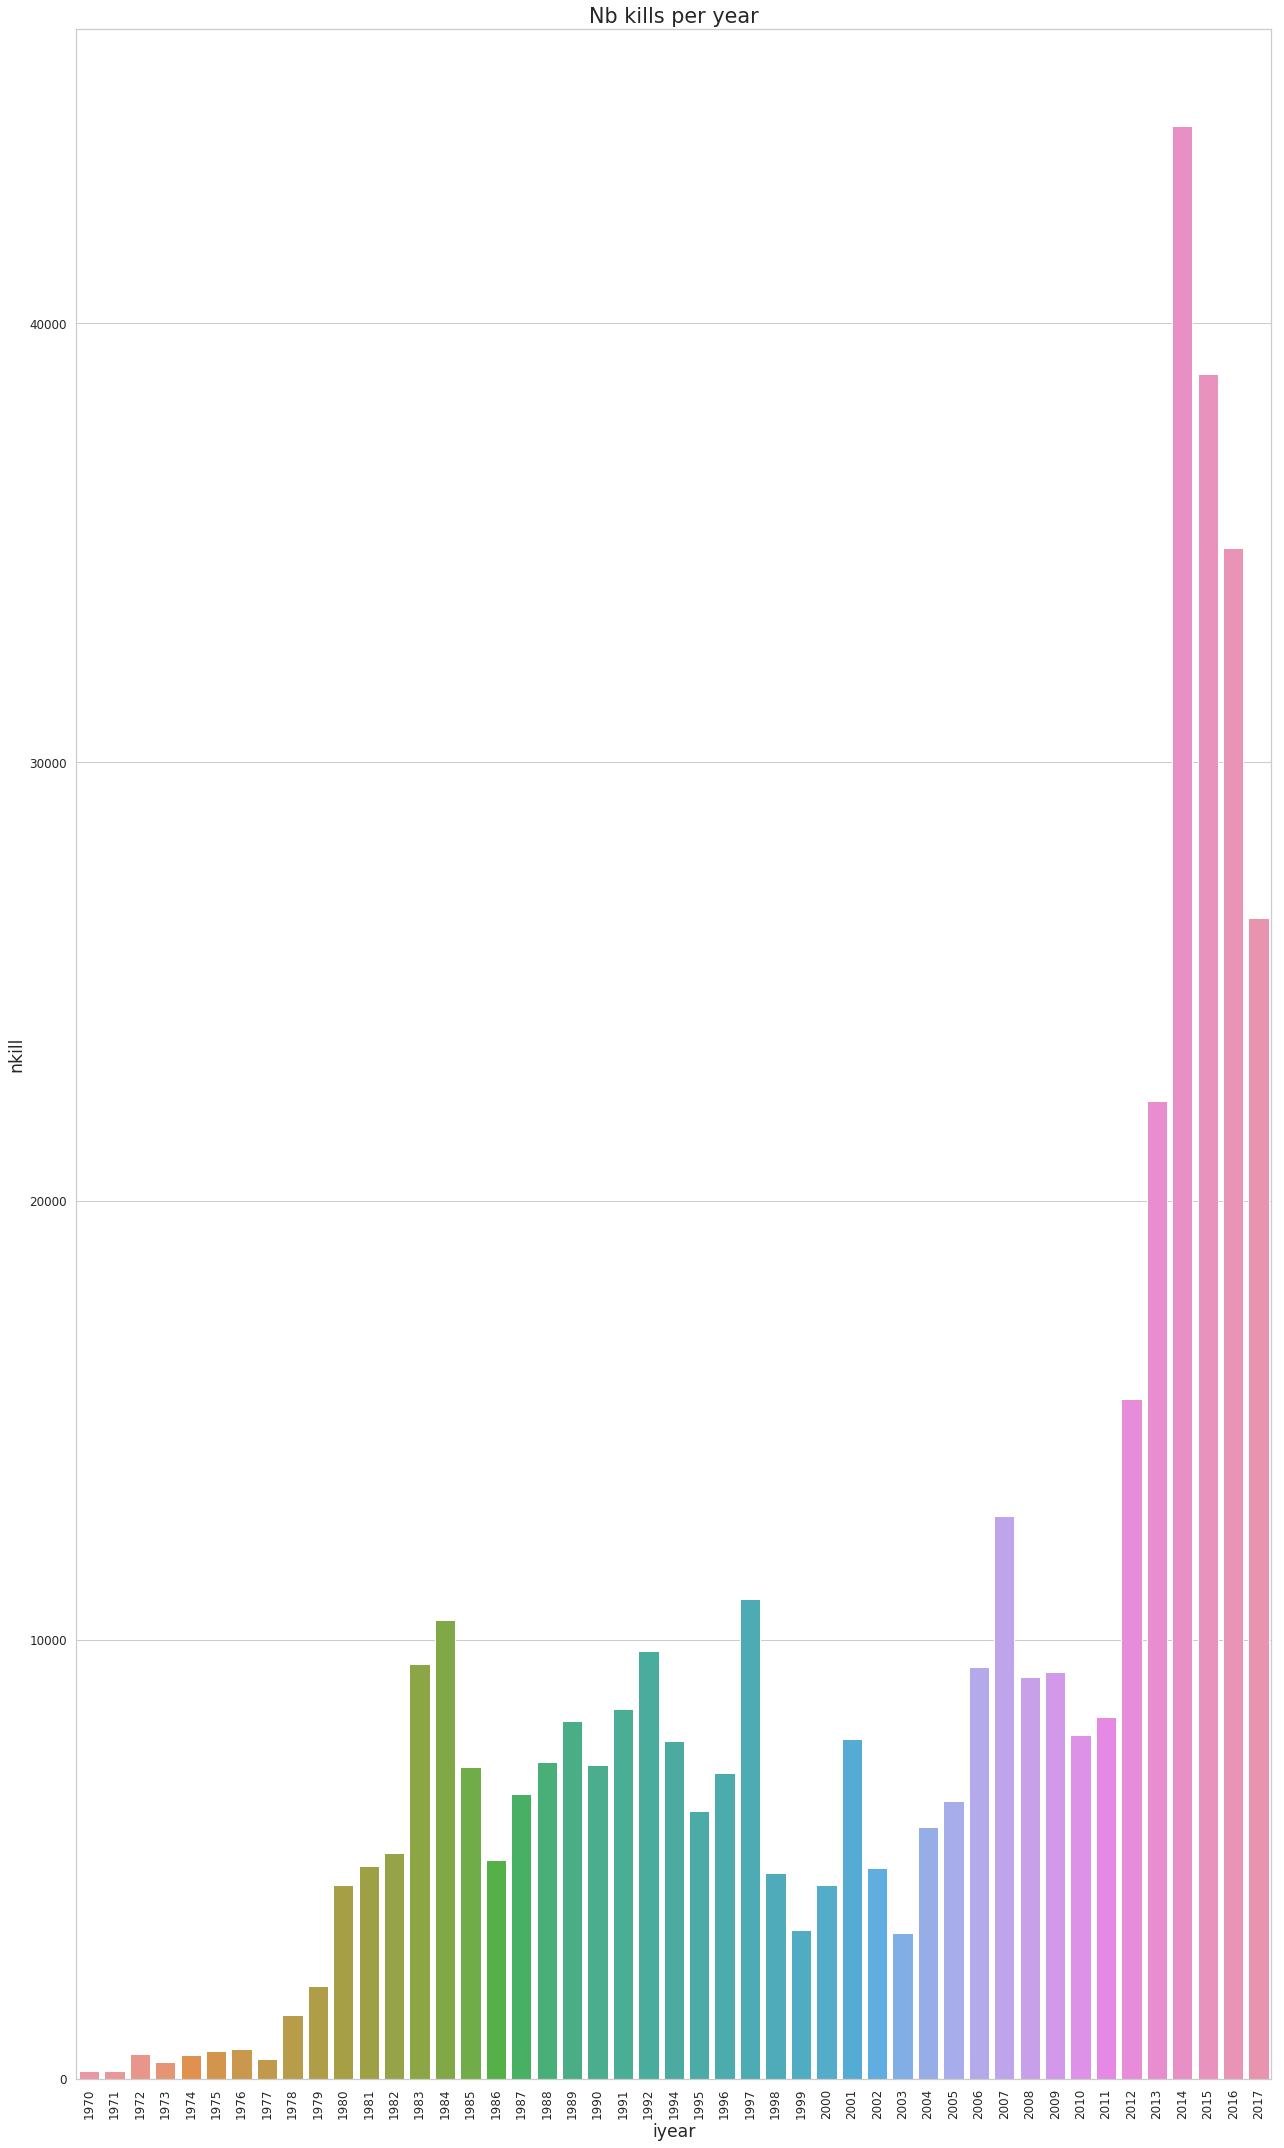

In [120]:
# sns.set(style="ticks")
sns.set(style="whitegrid")

figsize=(18, 30)
xcol = "iyear"

params = get_params()

plt.rcParams.update(params)
plt.tick_params(labelsize=12)
sns.barplot(y=grouped_year['nkill'].sum(), x=grouped_year['nkill'].sum().keys())
plt.title('Nb kills per year')
plt.xticks(rotation=90)
# plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

In [52]:
# sns.set(style="ticks")
sns.set(style="whitegrid")

figsize=(20, 8)
xcol = "Origin/Ethnicity"
params = get_params()
plt.rcParams.update(params)
org = df[xcol].unique()
l = len(df[xcol])
con = []
for country in df[xcol].unique():
    c = df[df[xcol]==country]
    if len(c)>l*0.03:
        x = df[df[xcol]==country]["Release Year"].value_counts()
        sns.lineplot(x.index, x.values)
        con.append(country)
plt.legend(con)
plt.title("Movie Count Per "+ xcol)
# plt.tight_layout()
plt.show()

In [52]:
from scipy.stats.stats import pearsonr

In [116]:
print('Corrélation entre nombre de morts par an et nombre d\'attentats par an : ' + str(pearsonr(grouped_year['nkill'].sum().values,grouped_year['iyear'].value_counts().values)[0]))

Corrélation entre nombre de morts par an et nombre d'attentats par an : 0.9660049537179569
